In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import sklearn.linear_model as LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('RealLifeProblem.csv')

In [3]:
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [4]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
data = raw_data.drop(['Model'], axis = 1)

In [6]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [7]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
data_no_mv = data.dropna(axis=0)

In [9]:
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


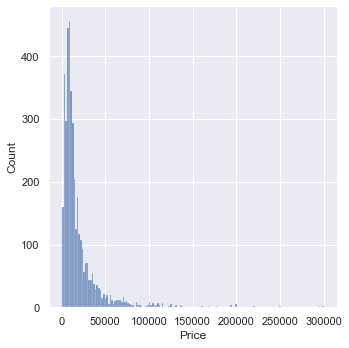

In [10]:
sns.displot(data_no_mv['Price'])

In [11]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


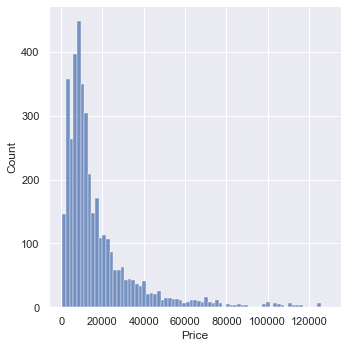

In [12]:
sns.displot(data_1['Price'])

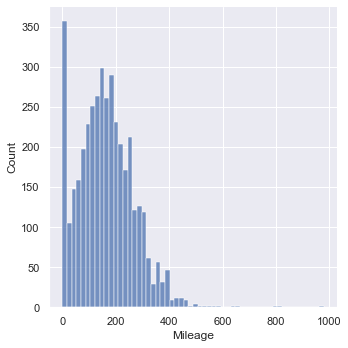

In [13]:
sns.displot(data_no_mv['Mileage'])

In [14]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

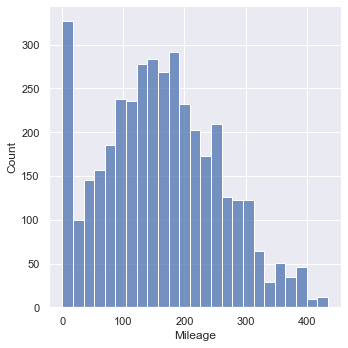

In [15]:
sns.displot(data_2['Mileage'])

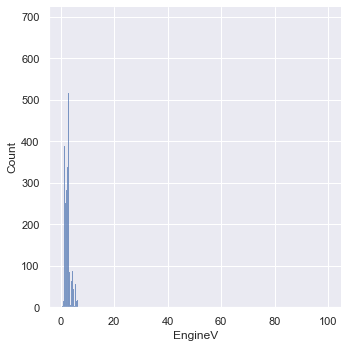

In [16]:
sns.displot(data_no_mv['EngineV'])

In [17]:
q = data_2['EngineV'].quantile(0.99)
data_3 = data_2[data_2['EngineV']<q]

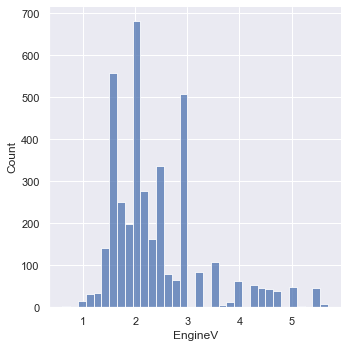

In [18]:
sns.displot(data_3['EngineV'])

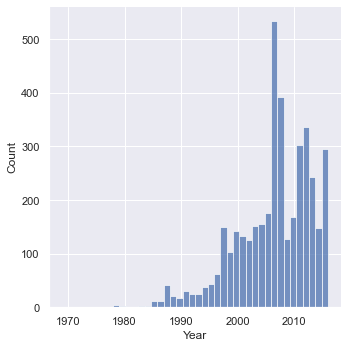

In [19]:
sns.displot(data_no_mv['Year'])

In [20]:
q = data_3['Year'].quantile(0.1)
data_4 = data_3[data_3['Year']>q]

In [21]:
data_cleaned = data_4.reset_index(drop=True)

In [22]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
4,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006
...,...,...,...,...,...,...,...,...
3428,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3429,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3430,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3431,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


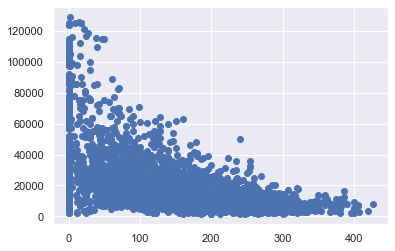

In [23]:
plt.scatter (data_cleaned['Mileage'], data_cleaned['Price'])

In [24]:
log_price = np.log(data_cleaned['Price'])

In [25]:
data_cleaned['Log_Price'] = log_price

In [26]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
4,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997
...,...,...,...,...,...,...,...,...,...
3428,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3429,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3430,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3431,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


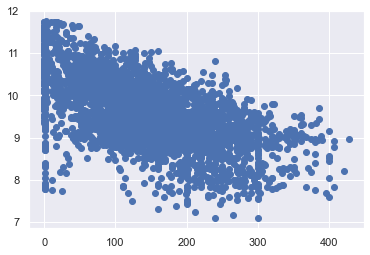

In [27]:
plt.scatter (data_cleaned['Mileage'], data_cleaned['Log_Price'])

In [28]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

In [29]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
1,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
2,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
3,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
4,Audi,vagon,200,2.7,Diesel,yes,2006,9.560997
...,...,...,...,...,...,...,...,...
3428,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3429,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3430,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3431,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
variables = data_cleaned[['Mileage', 'Year' , 'EngineV']]
vif = pd.DataFrame()
vif["Feature"] = variables.columns 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])] 
vif
  

,Feature,VIF
0,Mileage,3.898858
1,Year,10.583357
2,EngineV,8.010969


In [32]:
data_no_multi = data_cleaned.drop(['Year'] , axis=1)

In [33]:
data_no_multi

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log_Price
0,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
1,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
2,Audi,crossover,240,4.2,Petrol,yes,10.043249
3,Toyota,crossover,120,2.0,Petrol,yes,9.814656
4,Audi,vagon,200,2.7,Diesel,yes,9.560997
...,...,...,...,...,...,...,...
3428,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3429,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3430,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3431,BMW,sedan,1,3.5,Petrol,yes,8.779557


In [34]:
data_with_dummies = pd.get_dummies(data_no_multi , drop_first = True)

In [35]:
data_with_dummies

,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3428,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3429,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3430,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3431,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [39]:
variables = data_with_dummies[['Mileage', 'EngineV', 'Brand_BMW', 'Brand_Toyota', 'Body_hatch']]
vif = pd.DataFrame()
vif["Feature"] = variables.columns 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])] 
vif

,Feature,VIF
0,Mileage,3.047796
1,EngineV,3.765785
2,Brand_BMW,1.274551
3,Brand_Toyota,1.281550
4,Body_hatch,1.043282


In [41]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [43]:
cols = ['Log_Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [44]:
data_preprocessed = data_with_dummies[cols]

In [45]:
data_preprocessed

,Log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,9.560997,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3428,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3429,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3430,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3431,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [48]:
targets = data_preprocessed['Log_Price']
inputs = data_preprocessed.drop(['Log_Price'], axis = 1)

In [49]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [54]:
input_scaled = scaler.transform(inputs)

In [55]:
input_scaled

array([[ 3.21221333,  0.5043426 , -0.41818682, ..., -0.16314053,
        -0.72744481,  0.30318496],
       [ 2.41717575,  2.78674423, -0.41818682, ..., -0.16314053,
        -0.72744481,  0.30318496],
       [ 1.05754628,  1.91725789, -0.41818682, ..., -0.16314053,
         1.37467474,  0.30318496],
       ...,
       [-1.60410126,  0.61302839, -0.41818682, ..., -0.16314053,
        -0.72744481,  0.30318496],
       [-1.69627952,  1.15645735,  2.39127573, ..., -0.16314053,
         1.37467474,  0.30318496],
       [-0.27903863, -0.47382953, -0.41818682, ..., -0.16314053,
        -0.72744481,  0.30318496]])

In [57]:
from sklearn.model_selection import train_test_split

In [68]:
x_train , x_test , y_train ,  y_test = train_test_split(input_scaled , targets , test_size = 0.2 , random_state = 20)

In [69]:
x_train

array([[ 0.13576358,  1.69988631, -0.41818682, ..., -0.16314053,
        -0.72744481,  0.30318496],
       [-0.63622943,  1.48251473, -0.41818682, ..., -0.16314053,
        -0.72744481,  0.30318496],
       [-0.09468209, -1.01725849, -0.41818682, ..., -0.16314053,
        -0.72744481,  0.30318496],
       ...,
       [-0.78601911, -0.47382953, -0.41818682, ..., -0.16314053,
        -0.72744481,  0.30318496],
       [ 0.8271006 ,  0.06959943, -0.41818682, ...,  6.12968463,
        -0.72744481,  0.30318496],
       [ 0.04358531, -0.9085727 , -0.41818682, ..., -0.16314053,
         1.37467474,  0.30318496]])

In [70]:
x_test

array([[-0.10620438,  0.61302839, -0.41818682, ..., -0.16314053,
        -0.72744481,  0.30318496],
       [-1.22386589, -0.9085727 , -0.41818682, ..., -0.16314053,
         1.37467474,  0.30318496],
       [ 0.37773154,  0.61302839, -0.41818682, ..., -0.16314053,
         1.37467474,  0.30318496],
       ...,
       [-0.09468209,  3.33017319, -0.41818682, ..., -0.16314053,
         1.37467474,  0.30318496],
       [-0.8666751 ,  1.15645735, -0.41818682, ..., -0.16314053,
         1.37467474,  0.30318496],
       [-1.13168762, -0.47382953, -0.41818682, ..., -0.16314053,
         1.37467474,  0.30318496]])

In [72]:
reg = LinearRegression.LinearRegression()

In [73]:
reg.fit(x_train,y_train)

LinearRegression()

In [74]:
y_hat = reg.predict(x_train)

In [77]:
#Check prdeiction versus target values by getting 45 deg plot

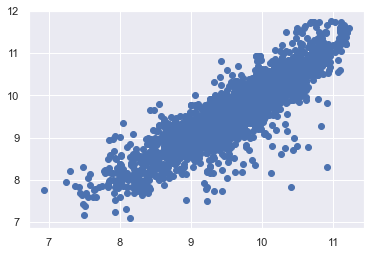

In [78]:
plt.scatter(y_hat,y_train)

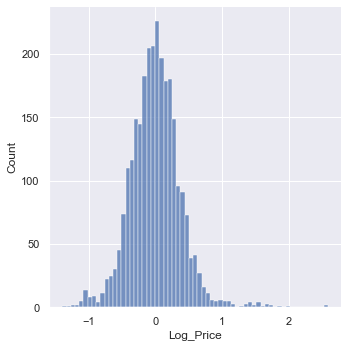

In [81]:
sns.displot(y_hat-y_train)

In [82]:
reg.score(x_train, y_train)

0.7767501312194104

In [83]:
reg.intercept_

9.541492157702502

In [84]:
reg.coef_

array([-0.4197618 ,  0.20018957,  0.02294001,  0.00164495, -0.15686472,
       -0.19685276, -0.08271883, -0.09425301, -0.12374518, -0.09592888,
       -0.15545884, -0.11718597, -0.16610231, -0.09924488, -0.02480507,
       -0.14283961,  0.2886729 ])

In [85]:
reg_summary = pd.DataFrame(inputs.columns.values , columns = ['features'])

In [86]:
reg_summary

,features
0,Mileage
1,EngineV
2,Brand_BMW
3,Brand_Mercedes-Benz
4,Brand_Mitsubishi
5,Brand_Renault
6,Brand_Toyota
7,Brand_Volkswagen
8,Body_hatch
9,Body_other


In [88]:
reg_summary ['Weights'] = reg.coef_

In [90]:
reg_summary

,features,Weights
0,Mileage,-0.419762
1,EngineV,0.200190
2,Brand_BMW,0.022940
3,Brand_Mercedes-Benz,0.001645
4,Brand_Mitsubishi,-0.156865
5,Brand_Renault,-0.196853
6,Brand_Toyota,-0.082719
7,Brand_Volkswagen,-0.094253
8,Body_hatch,-0.123745
9,Body_other,-0.095929


data_cleaned['Brand'].unique

In [92]:
data_cleaned['Brand'].unique()

array(['Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen', 'BMW',
       'Mitsubishi'], dtype=object)

In [93]:
y_hat_test = reg.predict(x_test)

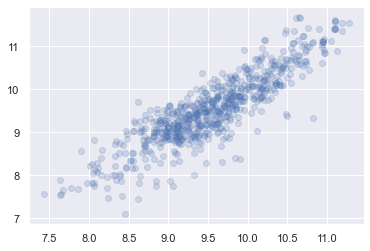

In [95]:
plt.scatter(y_hat_test,y_test, alpha = 0.2)

In [96]:
df_pf = pd.DataFrame(np.exp(y_hat_test) , columns = ['Predictions'])

In [97]:
df_pf

,Predictions
0,26886.322243
1,21335.376830
2,13678.625100
3,4734.828933
4,20932.519398
...,...
682,9077.746421
683,12643.193811
684,31029.273331
685,21777.967949


In [102]:
df_pf ['Targets'] = np.exp(y_test.reset_index(drop=True))

In [103]:
df_pf

,Predictions,Targets
0,26886.322243,20300.0
1,21335.376830,38000.0
2,13678.625100,25500.0
3,4734.828933,3650.0
4,20932.519398,24500.0
...,...,...
682,9077.746421,8900.0
683,12643.193811,9000.0
684,31029.273331,42500.0
685,21777.967949,22000.0


In [104]:
df_pf['Residuals'] = df_pf['Targets'] - df_pf['Predictions']

In [106]:
df_pf['Diff%'] = np.absolute(df_pf['Residuals']/df_pf['Targets']*100)

In [107]:
df_pf

,Predictions,Targets,Residuals,Diff%
0,26886.322243,20300.0,-6586.322243,32.444937
1,21335.376830,38000.0,16664.623170,43.854271
2,13678.625100,25500.0,11821.374900,46.358333
3,4734.828933,3650.0,-1084.828933,29.721341
4,20932.519398,24500.0,3567.480602,14.561145
...,...,...,...,...
682,9077.746421,8900.0,-177.746421,1.997151
683,12643.193811,9000.0,-3643.193811,40.479931
684,31029.273331,42500.0,11470.726669,26.989945
685,21777.967949,22000.0,222.032051,1.009237


In [108]:
df_pf.describe()

,Predictions,Targets,Residuals,Diff%
count,687.000000,687.000000,687.000000,687.000000
mean,17627.910193,19559.622693,1931.712499,32.712074
std,13246.553251,19141.561570,10004.433376,41.194203
min,1694.321750,1200.000000,-39195.288745,0.083211
25%,8794.520818,8200.000000,-2665.177302,11.248384
50%,13379.468228,13000.000000,189.508643,23.336911
75%,22160.533080,22900.000000,3642.783909,39.728544
max,78351.614493,119000.000000,76994.926871,357.367742


In [109]:
df_pf.sort_values(by = ['Diff%'])

,Predictions,Targets,Residuals,Diff%
238,17785.188473,17800.0,14.811527,0.083211
174,23776.281455,23800.0,23.718545,0.099658
308,18820.565623,18800.0,-20.565623,0.109392
88,12920.352439,12900.0,-20.352439,0.157771
40,7975.297652,7999.0,23.702348,0.296316
...,...,...,...,...
332,15850.784746,4100.0,-11750.784746,286.604506
437,4702.917634,1200.0,-3502.917634,291.909803
107,18774.966476,4500.0,-14274.966476,317.221477
122,50395.288745,11200.0,-39195.288745,349.957935


In [111]:
pd.options.display.max_rows = 999
df_pf

,Predictions,Targets,Residuals,Diff%
0,26886.322243,20300.00,-6586.322243,32.444937
1,21335.376830,38000.00,16664.623170,43.854271
2,13678.625100,25500.00,11821.374900,46.358333
3,4734.828933,3650.00,-1084.828933,29.721341
4,20932.519398,24500.00,3567.480602,14.561145
5,4389.174010,6300.00,1910.825990,30.330571
6,31497.063115,24500.00,-6997.063115,28.559441
7,9130.701213,8899.00,-231.701213,2.603677
8,40487.807848,115000.00,74512.192152,64.793211
9,26181.053952,57000.00,30818.946048,54.068326
